<a href="https://colab.research.google.com/github/PRIYESH740/Data-Analysis-on-Olympics-Dataset/blob/main/face_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import face_recognition   ##Detecting and recogniting faces
import cv2     ## intracting with images
import os       ## For Reading the file name
from google.colab.patches import cv2_imshow ## we are importing cv2_imshow from google.colab.patches because google colab doesn't support cv2.imshow() funciton.

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=035ae9218f51f2fbf04e8f1a33cc3b9af6f52a934dfb07127e76042e50383798
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
def read_img(path):
   img = cv2.imread(path) ## reading image
   (h,w) = img.shape[:2]  ## fetching height and width
   width = 500            ## hard coding width
   ratio = width / float(w) ## preparing a ration for height
   height = int(h * ratio)  ## generating new height
   return cv2.resize(img,(width,height)) ##return the reshaped image

In [ ]:
import os

In [ ]:
known_encodings = []
known_names = []
known_dir = '/content/drive/MyDrive/Colab Notebooks/Images' ##Known directory path
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file) ##Reading all the images
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])
print(known_names) ## Printing all the known labels

['RDJ', 'chris_Evans', 'Scarlett', 'Jeremy', 'Priyesh_Mishra']


Processing chris_Evans.jpg
[0.80885792 0.         0.94770672 0.86299338 0.86437448]


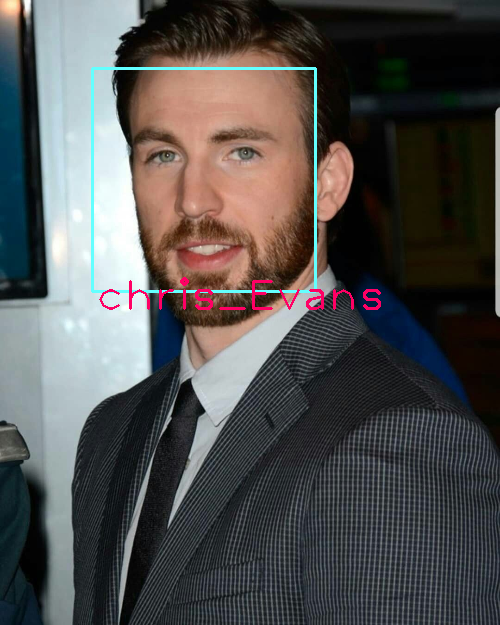

Processing R.jpg
[0.78533993 0.78624263 1.07864754 0.59836049 0.77365457]


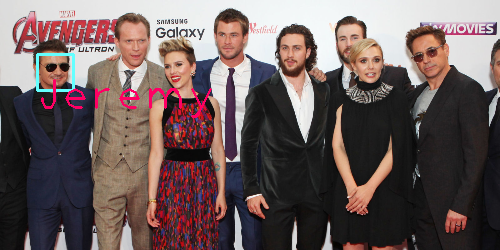

Processing Getty.jpg
[0.54006626 0.78751226 0.89007697 0.77555487 0.79296215]


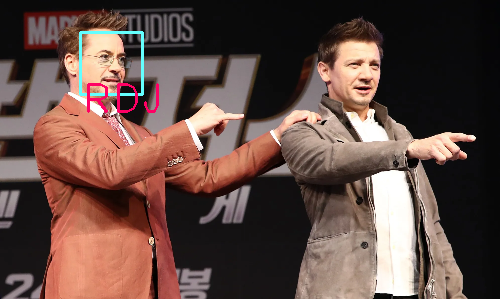

Processing jer.jpg
[0.78315337 0.87036578 0.90304127 0.40399027 0.78663856]


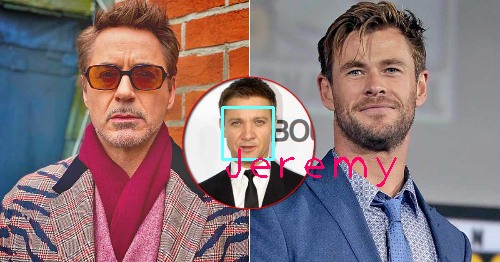

Processing itsmy.jpg
[0.87318128 0.88351982 0.93549839 0.71803474 0.3328217 ]


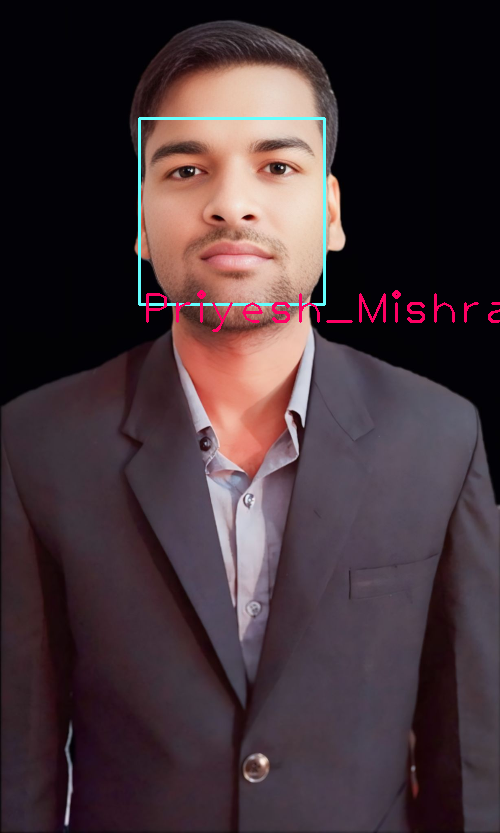

In [ ]:
unknown_dir = '/content/drive/MyDrive/Datasets/UNKN' ##UNknown Images Directory
for file in os.listdir(unknown_dir):
 print("Processing",file)
 img = read_img(unknown_dir + '/' + file)##reading images
 img_enc = face_recognition.face_encodings(img)[0]##Encodings
 results = face_recognition.compare_faces(known_encodings,img_enc)
 ##Comparing Known Encodings with Unknown encoding
 print(face_recognition.face_distance(known_encodings,img_enc))
 ## Printing Face Distances
 res = [i for i, val in enumerate(results) if val]
 name = known_names[res[0]]

 '''
Drawing a rectangle box around the faces of unknown images using  face_locations function in library
'''
 (top,right,bottom,left) = face_recognition.face_locations(img)[0]
 cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
 ##Drawing Rectangle
 cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3, (100,0,255),2) ##Putting labels(names) on the rectangle
 cv2_imshow(img) ##showing images

In [ ]:
# import cv2

# # Open the default camera
# cam = cv2.VideoCapture(0)

# # Get the default frame width and height
# frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (frame_width, frame_height))

# while True:
#     ret, frame = cam.read()

#     # Write the frame to the output file
#     out.write(frame)

#     # Display the captured frame
#     cv2.imshow('Camera', frame)

#     # Press 'q' to exit the loop
#     if cv2.waitKey(1) == ord('q'):
#         break

# # Release the capture and writer objects
# cam.release()
# out.release()
# cv2.destroyAllWindows()